In [ ]:
# SECP 3223: Data Analytics Programming – Group Project (Phase II)

Group Members:  
- AIN NURNABILA BINTI MOHD AZHAR (A23CS0207)  
- DAMIYA AINA BINTI BASIR ABD SHAMMAD (A23CS0220)  
- NURUL ASYIKIN BINTI KHAIRUL ANUAR (A23CS0162)  
- NABIL AFLAH FOO (A23CS)  

**Link video letak sini**

---

## 1. Introduction

This study uses 2014 fuel usage and emissions data to analyze CO2 emissions from Malaysian car registrations in 2025.  Our aim is to use machine learning and insights to group cars according to their emission levels.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('finalised_dataset.csv')
df.head()

,date_reg,type,maker,model,colour,fuel,state,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2025-01-01,motokar,PORSCHE,911 CARRERA,grey,petrol,Johor,MINICOMPACT,3.4,6,AM7,Z,10.1,232
1,2025-01-01,motokar,PORSCHE,911 CARRERA,grey,petrol,Johor,MINICOMPACT,3.4,6,M7,Z,10.7,246
2,2025-01-02,motokar,PORSCHE,911 CARRERA,grey,petrol,Johor,MINICOMPACT,3.4,6,AM7,Z,10.1,232
3,2025-01-02,motokar,PORSCHE,911 CARRERA,grey,petrol,Johor,MINICOMPACT,3.4,6,M7,Z,10.7,246
4,2025-01-03,motokar,PORSCHE,911 CARRERA,black,petrol,W.P. Kuala Lumpur,MINICOMPACT,3.4,6,AM7,Z,10.1,232


In [ ]:
## 2. Summary Analytics

In [3]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,25863.000000,25863.000000,25863.000000,25863.000000
mean,1.996288,4.134400,8.061408,185.492828
std,0.509708,0.521105,1.398450,32.145804
min,1.400000,4.000000,7.000000,161.000000
25%,1.800000,4.000000,7.200000,166.000000
50%,1.800000,4.000000,7.600000,175.000000
75%,2.000000,4.000000,8.600000,198.000000
max,6.800000,12.000000,19.000000,437.000000


In [5]:
df.groupby('maker')['CO2EMISSIONS'].mean().sort_values(ascending=False).head(10)

maker
ASTON MARTIN    359.000000
BENTLEY         348.600000
MASERATI        347.000000
NISSAN          297.000000
PORSCHE         284.729145
DODGE           279.500000
AUDI            273.242424
FORD            266.568627
VOLVO           257.520548
VOLKSWAGEN      256.122356
Name: CO2EMISSIONS, dtype: float64

In [7]:
df['fuel'].value_counts()

fuel
petrol           23754
hybrid_petrol     2059
diesel              50
Name: count, dtype: int64

In [ ]:
## 3. Data Visualization

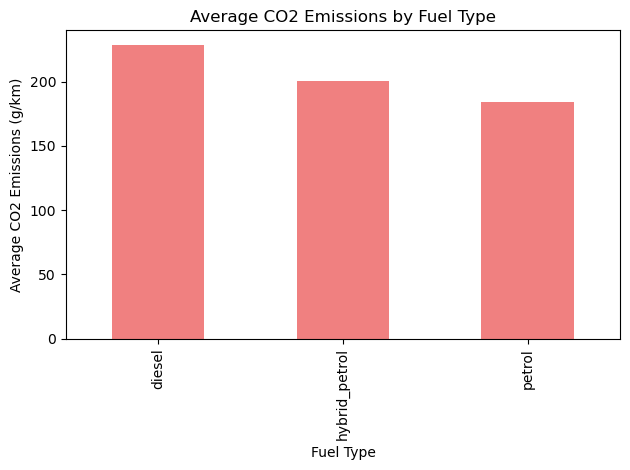

In [3]:
avg_emissions = df.groupby('fuel')['CO2EMISSIONS'].mean().sort_values(ascending=False)
avg_emissions.plot(kind='bar', color='lightcoral')
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()


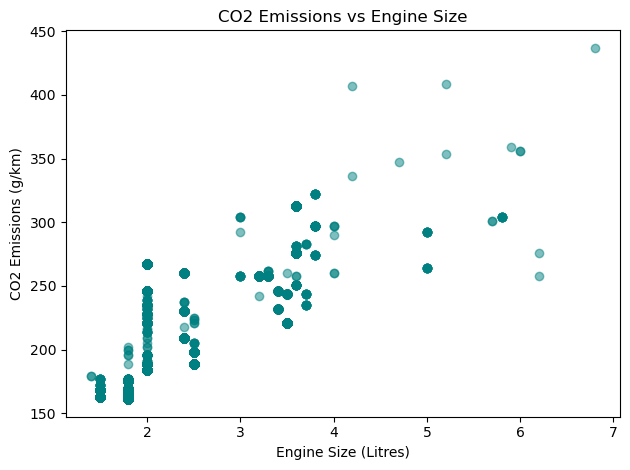

In [28]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], alpha=0.5, color='teal')
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size (Litres)')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()


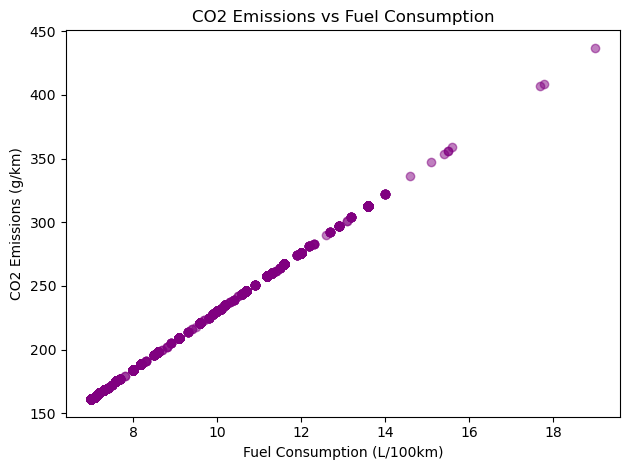

In [30]:
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], alpha=0.5, color='purple')
plt.title('CO2 Emissions vs Fuel Consumption')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()


In [ ]:
## 4. Machine Learning: Classification

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Binning CO2 emissions
bins = [0, 150, 250, np.inf]
labels = ['Low', 'Medium', 'High']
df['EMISSION_CLASS'] = pd.cut(df['CO2EMISSIONS'], bins=bins, labels=labels)

# Features and labels
features = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB']]
labels = df['EMISSION_CLASS']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 497    0]
 [   0 7262]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       497
      Medium       1.00      1.00      1.00      7262

    accuracy                           1.00      7759
   macro avg       1.00      1.00      1.00      7759
weighted avg       1.00      1.00      1.00      7759



In [ ]:
## 5. Conclusion

Summary of key findings:
- The size of the engine and the type of vehicle have a big influence on CO2 emissions.  - Classification model achieved reasonable performance in categorizing emission levels.
Recommendations for reducing emissions:
  - Use hybrid or electric vehicles.
  - Encourage a more strict emissions standards for high-emission car brands.

---

## Appendix

**Letak link video**
